In [1]:
import pandas as pd
from prophet import Prophet
import itertools
import numpy as np
import plotly.graph_objects as go
import yfinance as yf
sym = 'BAJFINANCE'

In [234]:
data = yf.download(tickers=sym+'.NS', period='5y', interval='1d')
data.to_csv(sym+".csv")

[*********************100%***********************]  1 of 1 completed


In [2]:
df_temp=pd.read_csv(sym + ".csv")


df_temp.tail()


,Date,Open,High,Low,Close,Adj Close,Volume
1229,2021-11-11,7570.200195,7600.950195,7410.00,7452.700195,7452.700195,634400
1230,2021-11-12,7500.000000,7600.250000,7453.00,7579.100098,7579.100098,497128
1231,2021-11-15,7579.000000,7627.450195,7490.00,7534.250000,7534.250000,402518
1232,2021-11-16,7525.000000,7650.000000,7500.75,7555.700195,7555.700195,598049
1233,2021-11-17,7528.000000,7692.000000,7521.25,7607.649902,7607.649902,645376


In [3]:

df_temp.rename(columns={df_temp.columns[0]:"Datetime"})

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2016-11-17,903.500000,903.500000,860.00,871.150024,862.519653,1929384
1,2016-11-18,872.000000,901.450012,865.00,878.400024,869.697815,1647276
2,2016-11-21,891.450012,891.450012,815.50,832.200012,823.955566,2076791
3,2016-11-22,850.049988,863.000000,830.25,858.000000,849.499878,1434086
4,2016-11-23,871.000000,871.450012,844.50,850.250000,841.826782,1161595
...,...,...,...,...,...,...,...
1229,2021-11-11,7570.200195,7600.950195,7410.00,7452.700195,7452.700195,634400
1230,2021-11-12,7500.000000,7600.250000,7453.00,7579.100098,7579.100098,497128
1231,2021-11-15,7579.000000,7627.450195,7490.00,7534.250000,7534.250000,402518
1232,2021-11-16,7525.000000,7650.000000,7500.75,7555.700195,7555.700195,598049


In [4]:
df_temp

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-17,903.500000,903.500000,860.00,871.150024,862.519653,1929384
1,2016-11-18,872.000000,901.450012,865.00,878.400024,869.697815,1647276
2,2016-11-21,891.450012,891.450012,815.50,832.200012,823.955566,2076791
3,2016-11-22,850.049988,863.000000,830.25,858.000000,849.499878,1434086
4,2016-11-23,871.000000,871.450012,844.50,850.250000,841.826782,1161595
...,...,...,...,...,...,...,...
1229,2021-11-11,7570.200195,7600.950195,7410.00,7452.700195,7452.700195,634400
1230,2021-11-12,7500.000000,7600.250000,7453.00,7579.100098,7579.100098,497128
1231,2021-11-15,7579.000000,7627.450195,7490.00,7534.250000,7534.250000,402518
1232,2021-11-16,7525.000000,7650.000000,7500.75,7555.700195,7555.700195,598049


In [5]:
df_temp[df_temp.columns[0]]

0       2016-11-17
1       2016-11-18
2       2016-11-21
3       2016-11-22
4       2016-11-23
           ...    
1229    2021-11-11
1230    2021-11-12
1231    2021-11-15
1232    2021-11-16
1233    2021-11-17
Name: Date, Length: 1234, dtype: object


#df_temp = pd.read_csv("IRCTC.csv")

In [6]:
# df_req = df_temp[["index","Close"]]

In [7]:
# df_req

In [8]:

df=df_temp[[df_temp.columns[0],"Close"]]


In [9]:
df[1:20]

,Date,Close
1,2016-11-18,878.400024
2,2016-11-21,832.200012
3,2016-11-22,858.000000
4,2016-11-23,850.250000
5,2016-11-24,820.700012
6,2016-11-25,877.900024
7,2016-11-28,879.250000
8,2016-11-29,907.250000
9,2016-11-30,919.799988
10,2016-12-01,914.200012


In [10]:
# df

In [11]:
# date = pd.read_csv("date.csv")
# df[df.columns[0]] = date["Date"]

In [12]:
# df

In [13]:
# df.dtypes

In [14]:
#df["Datetime"]=pd.to_datetime(df["Datetime"])

In [15]:
df.dtypes

Date      object
Close    float64
dtype: object

In [16]:
df.columns=['ds','y']

In [17]:
df[-20:]

,ds,y
1214,2021-10-19,7739.299805
1215,2021-10-20,7761.350098
1216,2021-10-21,7737.299805
1217,2021-10-22,7710.200195
1218,2021-10-25,7646.649902
1219,2021-10-26,7855.649902
1220,2021-10-27,7482.149902
1221,2021-10-28,7484.250000
1222,2021-10-29,7400.200195
1223,2021-11-01,7413.950195


In [18]:
m= Prophet(interval_width=0.9,daily_seasonality=True)
model = m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [19]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast=m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-11-17,804.706163,239.330412,1174.338202,804.706163,804.706163,-80.223199,-80.223199,-80.223199,-220.742641,...,0.655269,0.655269,0.655269,139.864173,139.864173,139.864173,0.0,0.0,0.0,724.482964
1,2016-11-18,809.891783,249.370499,1225.103597,809.891783,809.891783,-80.419359,-80.419359,-80.419359,-220.742641,...,-10.108720,-10.108720,-10.108720,150.432002,150.432002,150.432002,0.0,0.0,0.0,729.472425
2,2016-11-21,825.448645,282.089921,1202.682479,825.448645,825.448645,-73.913228,-73.913228,-73.913228,-220.742641,...,-26.318390,-26.318390,-26.318390,173.147803,173.147803,173.147803,0.0,0.0,0.0,751.535417
3,2016-11-22,830.634266,324.148709,1226.881220,830.634266,830.634266,-53.348529,-53.348529,-53.348529,-220.742641,...,-10.216316,-10.216316,-10.216316,177.610428,177.610428,177.610428,0.0,0.0,0.0,777.285736
4,2016-11-23,835.819886,314.744320,1230.630878,835.819886,835.819886,-49.389704,-49.389704,-49.389704,-220.742641,...,-9.197497,-9.197497,-9.197497,180.550434,180.550434,180.550434,0.0,0.0,0.0,786.430182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,2022-02-21,8861.448453,8327.475890,9398.516966,8596.909189,9186.388544,11.823493,11.823493,11.823493,-220.742641,...,-26.318390,-26.318390,-26.318390,258.884524,258.884524,258.884524,0.0,0.0,0.0,8873.271946
1330,2022-02-22,8871.191827,8342.757610,9429.212715,8599.339527,9201.290915,21.777816,21.777816,21.777816,-220.742641,...,-10.216316,-10.216316,-10.216316,252.736774,252.736774,252.736774,0.0,0.0,0.0,8892.969642
1331,2022-02-23,8880.935200,8369.396421,9453.912991,8606.138988,9217.898187,15.496745,15.496745,15.496745,-220.742641,...,-9.197497,-9.197497,-9.197497,245.436883,245.436883,245.436883,0.0,0.0,0.0,8896.431945
1332,2022-02-24,8890.678574,8391.588661,9449.301377,8607.704301,9232.590691,16.953047,16.953047,16.953047,-220.742641,...,0.655269,0.655269,0.655269,237.040419,237.040419,237.040419,0.0,0.0,0.0,8907.631621


In [20]:
print(forecast[["ds","yhat"]][-100:])
print(df[-100:])
forecast.dtypes
df.dtypes

             ds         yhat
1234 2021-11-18  7863.663746
1235 2021-11-19  7872.125786
1236 2021-11-20  7927.540373
1237 2021-11-21  7943.697391
1238 2021-11-22  7904.379941
...         ...          ...
1329 2022-02-21  8873.271946
1330 2022-02-22  8892.969642
1331 2022-02-23  8896.431945
1332 2022-02-24  8907.631621
1333 2022-02-25  8897.176809

[100 rows x 2 columns]
              ds            y
1134  2021-06-23  6015.600098
1135  2021-06-24  6043.600098
1136  2021-06-25  6075.799805
1137  2021-06-28  6037.049805
1138  2021-06-29  6052.399902
...          ...          ...
1229  2021-11-11  7452.700195
1230  2021-11-12  7579.100098
1231  2021-11-15  7534.250000
1232  2021-11-16  7555.700195
1233  2021-11-17  7607.649902

[100 rows x 2 columns]


ds     object
y     float64
dtype: object

In [21]:
se = np.square(forecast.loc[:, 'yhat'] - df["y"])
mse = np.mean(se)
rmse = np.sqrt(mse)
rmse


281.60376344145806

In [22]:
mse

79300.67958439268

In [23]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [24]:
mse = mean_squared_error(df['y'], forecast.loc[:, 'yhat'][:-100])
mae = mean_absolute_error(df['y'], forecast.loc[:, 'yhat'][:-100])
r2 = r2_score(df['y'], forecast.loc[:, 'yhat'][:-100])

In [25]:
mse
rmse

281.60376344145806

In [26]:
mae

226.92898028337936

In [27]:
r2

0.9727826950654874

In [28]:
forecast[-271:-230]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1063,2021-03-08,5451.267575,4810.412178,5740.271059,5451.267575,5451.267575,-177.807042,-177.807042,-177.807042,-220.742641,...,-26.318390,-26.318390,-26.318390,69.253989,69.253989,69.253989,0.0,0.0,0.0,5273.460533
1064,2021-03-09,5461.010949,4840.904821,5774.404266,5461.010949,5461.010949,-178.682981,-178.682981,-178.682981,-220.742641,...,-10.216316,-10.216316,-10.216316,52.275977,52.275977,52.275977,0.0,0.0,0.0,5282.327969
1065,2021-03-10,5470.754323,4870.226059,5749.059127,5470.754323,5470.754323,-194.833251,-194.833251,-194.833251,-220.742641,...,-9.197497,-9.197497,-9.197497,35.106887,35.106887,35.106887,0.0,0.0,0.0,5275.921072
1066,2021-03-12,5490.241071,4782.546616,5716.362810,5490.241071,5490.241071,-230.401760,-230.401760,-230.401760,-220.742641,...,-10.108720,-10.108720,-10.108720,0.449600,0.449600,0.449600,0.0,0.0,0.0,5259.839311
1067,2021-03-15,5519.471193,4745.569201,5653.599013,5519.471193,5519.471193,-298.453649,-298.453649,-298.453649,-220.742641,...,-26.318390,-26.318390,-26.318390,-51.392618,-51.392618,-51.392618,0.0,0.0,0.0,5221.017544
1068,2021-03-16,5529.214567,4747.680625,5686.491771,5529.214567,5529.214567,-299.349053,-299.349053,-299.349053,-220.742641,...,-10.216316,-10.216316,-10.216316,-68.390096,-68.390096,-68.390096,0.0,0.0,0.0,5229.865514
1069,2021-03-17,5538.957941,4750.268508,5703.825708,5538.957941,5538.957941,-315.088323,-315.088323,-315.088323,-220.742641,...,-9.197497,-9.197497,-9.197497,-85.148185,-85.148185,-85.148185,0.0,0.0,0.0,5223.869617
1070,2021-03-18,5548.701315,4783.704869,5668.729990,5548.701315,5548.701315,-321.698926,-321.698926,-321.698926,-220.742641,...,0.655269,0.655269,0.655269,-101.611554,-101.611554,-101.611554,0.0,0.0,0.0,5227.002389
1071,2021-03-19,5558.444689,4764.531215,5686.177815,5558.444689,5558.444689,-348.579175,-348.579175,-348.579175,-220.742641,...,-10.108720,-10.108720,-10.108720,-117.727815,-117.727815,-117.727815,0.0,0.0,0.0,5209.865513
1072,2021-03-22,5587.674810,4726.940294,5621.528489,5587.674810,5587.674810,-410.586628,-410.586628,-410.586628,-220.742641,...,-26.318390,-26.318390,-26.318390,-163.525597,-163.525597,-163.525597,0.0,0.0,0.0,5177.088183


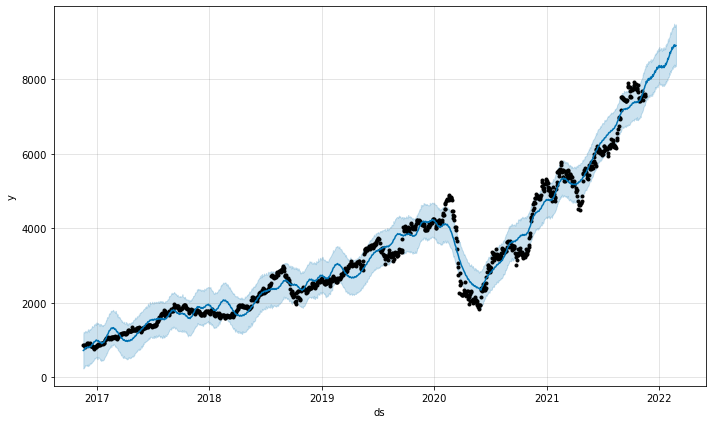

In [29]:
plotted = m.plot(forecast);

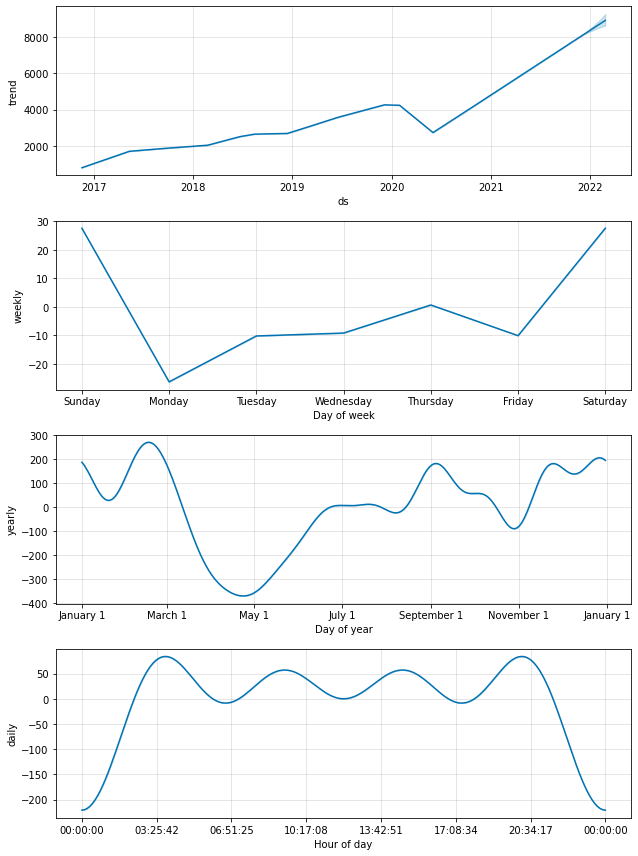

In [30]:
plot2 = m.plot_components(forecast)

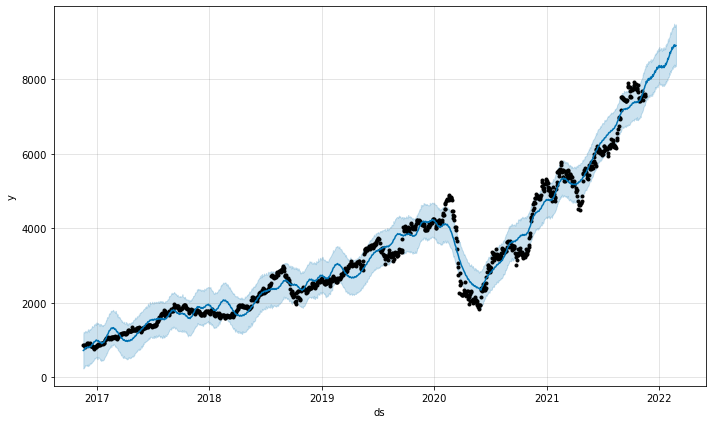

In [31]:
plotted